In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt

# <u>Import of all CSV files </u>

In [2]:
emp_rate=pd.read_csv('EMP_RATE.csv')

In [3]:
#emp_rate.info()

In [4]:
income_ineq=pd.read_csv('INCOMEINEQ.csv')

In [5]:
#income_ineq.info()

In [6]:
PISA_math=pd.read_csv('PISAMATH.csv')

In [7]:
#PISA_math.info()

In [8]:
PISA_read=pd.read_csv('PISAREAD.csv')

In [9]:
#PISA_read.info()

In [10]:
PISA_science=pd.read_csv('PISASCIENCE.csv')

In [11]:
#PISA_science.info()

In [12]:
PISA_science

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISASCIENCE,BOY,MEANSCORE,A,2006,527.000,NaN
1,AUS,PISASCIENCE,BOY,MEANSCORE,A,2009,527.000,NaN
2,AUS,PISASCIENCE,BOY,MEANSCORE,A,2012,523.728,NaN
3,AUS,PISASCIENCE,BOY,MEANSCORE,A,2015,511.000,NaN
4,AUS,PISASCIENCE,BOY,MEANSCORE,A,2018,504.000,NaN
...,...,...,...,...,...,...,...,...
595,CRI,PISASCIENCE,BOY,MEANSCORE,A,2018,420.000,NaN
596,CRI,PISASCIENCE,GIRL,MEANSCORE,A,2018,411.000,NaN
597,LTU,PISASCIENCE,TOT,MEANSCORE,A,2018,482.000,NaN
598,LTU,PISASCIENCE,BOY,MEANSCORE,A,2018,479.000,NaN


# <u> Joining datasets </u>

In [13]:
eco_df=pd.merge(emp_rate, income_ineq,on=['LOCATION','TIME','FREQUENCY','Flag Codes'])

In [14]:
df1=pd.merge(PISA_science,PISA_read, on=['LOCATION','MEASURE','TIME','FREQUENCY','SUBJECT','Flag Codes'])

In [15]:
PISA_df=pd.merge(df1, PISA_math, on=['LOCATION','MEASURE','TIME','FREQUENCY','SUBJECT','Flag Codes'])

In [16]:
PISA_df

,LOCATION,INDICATOR_x,SUBJECT,MEASURE,FREQUENCY,TIME,Value_x,Flag Codes,INDICATOR_y,Value_y,INDICATOR,Value
0,AUS,PISASCIENCE,BOY,MEANSCORE,A,2006,527.000,NaN,PISAREAD,495.00,PISAMATH,527.000
1,AUS,PISASCIENCE,BOY,MEANSCORE,A,2009,527.000,NaN,PISAREAD,496.00,PISAMATH,519.000
2,AUS,PISASCIENCE,BOY,MEANSCORE,A,2012,523.728,NaN,PISAREAD,495.09,PISAMATH,510.115
3,AUS,PISASCIENCE,BOY,MEANSCORE,A,2015,511.000,NaN,PISAREAD,487.00,PISAMATH,497.000
4,AUS,PISASCIENCE,BOY,MEANSCORE,A,2018,504.000,NaN,PISAREAD,487.00,PISAMATH,494.000
...,...,...,...,...,...,...,...,...,...,...,...,...
587,CRI,PISASCIENCE,BOY,MEANSCORE,A,2018,420.000,NaN,PISAREAD,419.00,PISAMATH,411.000
588,CRI,PISASCIENCE,GIRL,MEANSCORE,A,2018,411.000,NaN,PISAREAD,434.00,PISAMATH,394.000
589,LTU,PISASCIENCE,TOT,MEANSCORE,A,2018,482.000,NaN,PISAREAD,476.00,PISAMATH,481.000
590,LTU,PISASCIENCE,BOY,MEANSCORE,A,2018,479.000,NaN,PISAREAD,457.00,PISAMATH,480.000


# <u> Data cleaning PISA dataframe </u>

In [17]:
PISA_df.drop(labels=['Flag Codes', 'MEASURE', 'FREQUENCY'],
             axis=1, 
             inplace=True)

In [18]:
PISA_df['value_PISASCIENCE']=PISA_df['Value_x']
PISA_df['value_PISAREAD']=PISA_df['Value_y']
PISA_df['value_PISAMATH']=PISA_df['Value']

In [19]:
PISA_df.drop(labels=['Value','Value_y','Value_x','INDICATOR_x','INDICATOR_y','INDICATOR'],axis=1, inplace=True)

In [20]:
PISA_df

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
0,AUS,BOY,2006,527.000,495.00,527.000
1,AUS,BOY,2009,527.000,496.00,519.000
2,AUS,BOY,2012,523.728,495.09,510.115
3,AUS,BOY,2015,511.000,487.00,497.000
4,AUS,BOY,2018,504.000,487.00,494.000
...,...,...,...,...,...,...
587,CRI,BOY,2018,420.000,419.00,411.000
588,CRI,GIRL,2018,411.000,434.00,394.000
589,LTU,TOT,2018,482.000,476.00,481.000
590,LTU,BOY,2018,479.000,457.00,480.000


In [21]:
PISA_df.to_csv('PISA_df.csv', index=False) 

# <u> splitting datasets and data viz on PISA index </u>

In [22]:
#values according to subject: GIRL, TOT, BOY

PISA_df.groupby(["SUBJECT"]).mean()

,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
SUBJECT,,,,
BOY,2012.274112,490.994939,469.659066,490.930812
GIRL,2012.274112,490.003208,503.035746,482.037193
TOT,2012.227273,490.434343,485.772727,486.308081


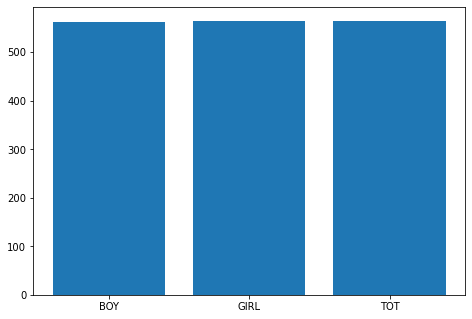

In [23]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=PISA_df['SUBJECT']
y=PISA_df['value_PISASCIENCE']
ax.bar(x,y)
plt.show()

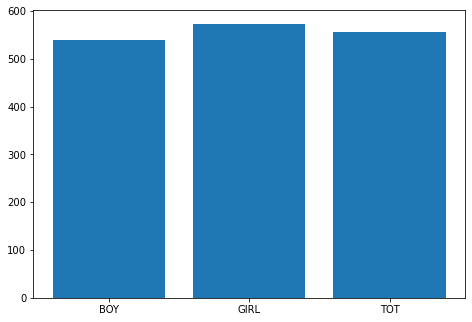

In [24]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=PISA_df['SUBJECT']
y=PISA_df['value_PISAREAD']
ax.bar(x,y)
plt.show()

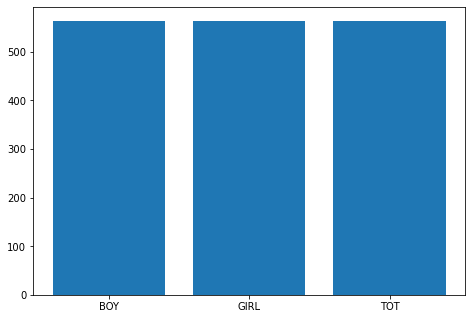

In [25]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=PISA_df['SUBJECT']
y=PISA_df['value_PISAMATH']
ax.bar(x,y)
plt.show()

In [26]:
#values according to subject and years

PISA_df.groupby(["SUBJECT", 'TIME']).mean()

value_PISASCIENCE  value_PISAREAD  value_PISAMATH
SUBJECT TIME                                                   
BOY     2006         494.040028      465.057250      494.158500
        2009         494.428459      469.218595      493.956270
        2012         495.650237      472.518079      493.139000
        2015         490.577778      474.288889      489.777778
        2018         481.365854      466.365854      484.585366
GIRL    2006         491.197722      502.821556      482.599667
        2009         494.860108      508.114459      483.102541
        2012         494.491842      509.742921      482.577500
        2015         487.200000      500.355556      482.600000
        2018         483.487805      495.365854      479.463415
TOT     2006         491.945946      482.189189      487.837838
        2009         494.648649      488.135135      488.216216
        2012         495.128205      490.820513      487.923077
        2015         488.931818      487.000000      486.045455
        2018         482.414634      480.756098      481.951220

<AxesSubplot:xlabel='TIME', ylabel='value_PISASCIENCE'>

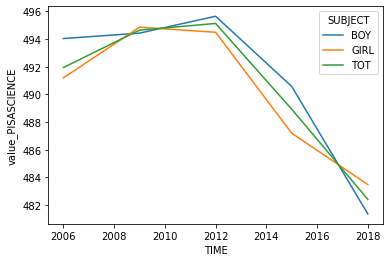

In [27]:
sns.lineplot(data=PISA_df.groupby(["SUBJECT", 'TIME']).mean(),
            x='TIME',
             y='value_PISASCIENCE',
             hue='SUBJECT')

In [28]:
#maximum PISA score in science
PISA_df[PISA_df['value_PISASCIENCE']==PISA_df['value_PISASCIENCE'].max()]
#maximum PISA score in science: girl in finland in 2006 

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
63,FIN,GIRL,2006,565.0,572.0,543.0


In [29]:
#minimum PISA score in science
PISA_df[PISA_df['value_PISASCIENCE']==PISA_df['value_PISASCIENCE'].min()]
#minimum PISA score in science: boy in India in 2009

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
325,IDN,BOY,2009,378.0,383.0,371.0


<AxesSubplot:xlabel='TIME', ylabel='value_PISAMATH'>

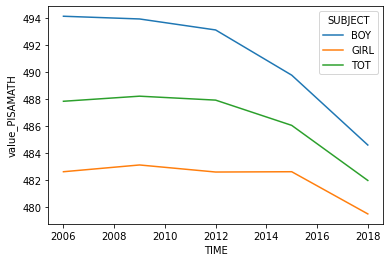

In [30]:
sns.lineplot(data=PISA_df.groupby(["SUBJECT", 'TIME']).mean(),
            x='TIME',
             y='value_PISAMATH',
             hue='SUBJECT')

In [31]:
#maximum PISA score in math
PISA_df[PISA_df['value_PISAMATH']==PISA_df['value_PISAMATH'].max()]
#maximum PISA score in math: boy and girl in Singapour in 2015

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
557,SGP,BOY,2015,559.0,525.0,564.0
558,SGP,GIRL,2015,552.0,546.0,564.0
579,SGP,TOT,2015,556.0,535.0,564.0


In [32]:
#minimum PISA score in math
PISA_df[PISA_df['value_PISAMATH']==PISA_df['value_PISAMATH'].min()]
#maximum PISA score in math: girl in Bresil in 2006

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
299,BRA,GIRL,2006,386.0,408.0,361.0


<AxesSubplot:xlabel='TIME', ylabel='value_PISAREAD'>

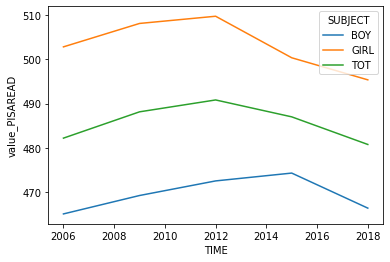

In [33]:
sns.lineplot(data=PISA_df.groupby(["SUBJECT", 'TIME']).mean(),
            x='TIME',
             y='value_PISAREAD',
             hue='SUBJECT')

In [34]:
#maximum PISA score in read
PISA_df[PISA_df['value_PISAREAD']==PISA_df['value_PISAREAD'].max()]
#maximum PISA score in read: girl in Sout Korea in 2006

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
153,KOR,GIRL,2006,523.0,574.0,543.0


In [35]:
#minimum PISA score in read
PISA_df[PISA_df['value_PISAREAD']==PISA_df['value_PISAREAD'].min()]
#maximum PISA score in read: boy in india in 2018

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
328,IDN,BOY,2018,393.0,358.0,374.0


# <u> cleaning datasets on economic values </u>

In [36]:
eco_df.head()

,LOCATION,INDICATOR_x,SUBJECT_x,MEASURE_x,FREQUENCY,TIME,Value_x,Flag Codes,INDICATOR_y,SUBJECT_y,MEASURE_y,Value_y
0,AUS,EMP,MEN,PC_WKGPOP,A,2012,78.13600,NaN,INCOMEINEQ,GINI,INEQ,0.326
1,AUS,EMP,TOT,PC_WKGPOP,A,2012,72.34558,NaN,INCOMEINEQ,GINI,INEQ,0.326
2,AUS,EMP,WOMEN,PC_WKGPOP,A,2012,66.57001,NaN,INCOMEINEQ,GINI,INEQ,0.326
3,AUS,EMP,MEN,PC_WKGPOP,A,2014,77.07588,NaN,INCOMEINEQ,GINI,INEQ,0.337
4,AUS,EMP,TOT,PC_WKGPOP,A,2014,71.56635,NaN,INCOMEINEQ,GINI,INEQ,0.337


In [37]:
eco_df.drop(labels=['Flag Codes', 'FREQUENCY'],
             axis=1, 
             inplace=True)

In [38]:
eco_df['PC_EMP']=eco_df['Value_x']
eco_df['Incomeineq']=eco_df['Value_y']

In [39]:
eco_df.drop(labels=['Value_y','Value_x','INDICATOR_x','INDICATOR_y'],axis=1, inplace=True)

In [40]:
eco_df.head()

,LOCATION,SUBJECT_x,MEASURE_x,TIME,SUBJECT_y,MEASURE_y,PC_EMP,Incomeineq
0,AUS,MEN,PC_WKGPOP,2012,GINI,INEQ,78.13600,0.326
1,AUS,TOT,PC_WKGPOP,2012,GINI,INEQ,72.34558,0.326
2,AUS,WOMEN,PC_WKGPOP,2012,GINI,INEQ,66.57001,0.326
3,AUS,MEN,PC_WKGPOP,2014,GINI,INEQ,77.07588,0.337
4,AUS,TOT,PC_WKGPOP,2014,GINI,INEQ,71.56635,0.337


In [41]:
eco_df['GENDER']=eco_df['SUBJECT_x']

In [42]:
eco_df.drop(labels=['SUBJECT_x','MEASURE_x','MEASURE_y','SUBJECT_y'], axis=1, inplace=True)

In [43]:
eco_df

,LOCATION,TIME,PC_EMP,Incomeineq,GENDER
0,AUS,2012,78.13600,0.326,MEN
1,AUS,2012,72.34558,0.326,TOT
2,AUS,2012,66.57001,0.326,WOMEN
3,AUS,2014,77.07588,0.337,MEN
4,AUS,2014,71.56635,0.337,TOT
...,...,...,...,...,...
1189,CRI,2019,61.64743,0.478,TOT
1190,CRI,2019,48.56737,0.478,WOMEN
1191,CRI,2020,67.89523,0.497,MEN
1192,CRI,2020,54.83073,0.497,TOT


In [44]:
eco_df.to_csv('eco_df.csv', index=False)

# <u> splitting datasets and data viz on economic values </u>

In [45]:
#inégalité selon le genre 
eco_df.groupby(['GENDER'])[['PC_EMP', 'Incomeineq']].mean()

,PC_EMP,Incomeineq
GENDER,,
MEN,72.738235,0.314739
TOT,67.079157,0.314739
WOMEN,61.446089,0.314739


In [46]:
eco_df.groupby(['LOCATION', 'GENDER'])[['PC_EMP', 'Incomeineq']].mean()

PC_EMP  Incomeineq
LOCATION GENDER                       
AUS      MEN     77.777865    0.329500
         TOT     72.527327    0.329500
         WOMEN   67.325083    0.329500
AUT      MEN     76.194231    0.279385
         TOT     71.400000    0.279385
...                    ...         ...
USA      TOT     69.394913    0.392714
         WOMEN   64.234606    0.392714
ZAF      MEN     49.502390    0.622000
         TOT     43.517840    0.622000
         WOMEN   37.686625    0.622000

[117 rows x 2 columns]

In [47]:
%matplotlib inline

In [48]:
eco_df.groupby('TIME')[['PC_EMP']].mean().head()

,PC_EMP
TIME,
1976,63.063890
1977,62.925000
1978,63.702777
1979,65.386110
1980,66.130553


<AxesSubplot:xlabel='TIME', ylabel='PC_EMP'>

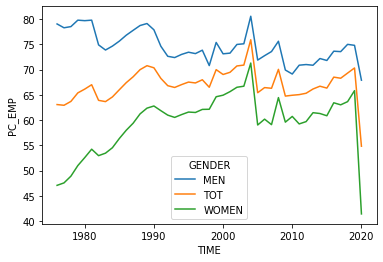

In [49]:
sns.lineplot(data=eco_df.groupby(['TIME', 'GENDER'])[['PC_EMP']].mean().reset_index(),
             x='TIME',
             y='PC_EMP',
             hue='GENDER')

In [50]:
eco_df.groupby('TIME')[['Incomeineq']].mean().head()

,Incomeineq
TIME,
1976,0.303
1977,0.289
1978,0.294
1979,0.289
1980,0.289


<AxesSubplot:xlabel='TIME', ylabel='Incomeineq'>

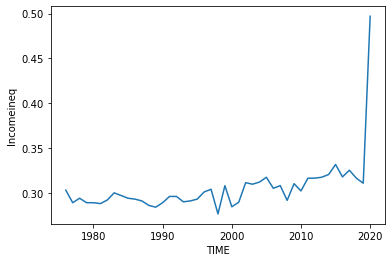

In [51]:
#tendance sur les années
sns.lineplot(data=eco_df.groupby(['TIME'])[['Incomeineq']].mean().reset_index(),
             x='TIME',
             y='Incomeineq'
             )

In [52]:
#split par pays: pays avec le plus d'inégalités

In [53]:
time_year = eco_df[eco_df["TIME"].isin([1976,1980, 1990,2000,2010,2018])]

In [54]:
time_year

,LOCATION,TIME,PC_EMP,Incomeineq,GENDER
9,AUS,2018,78.36244,0.325,MEN
10,AUS,2018,73.76588,0.325,TOT
11,AUS,2018,69.23586,0.325,WOMEN
21,AUT,2010,75.97500,0.280,MEN
22,AUT,2010,70.77500,0.280,TOT
...,...,...,...,...,...
1150,LTU,2018,72.40000,0.361,TOT
1151,LTU,2018,71.57500,0.361,WOMEN
1185,CRI,2018,75.03596,0.479,MEN
1186,CRI,2018,60.95155,0.479,TOT


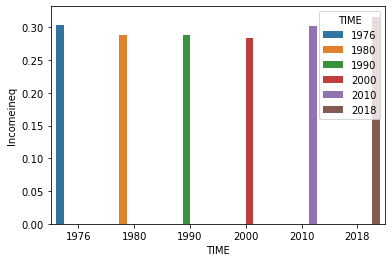

In [55]:
ax = sns.barplot(x="TIME",
                 y="Incomeineq",
                 hue='TIME',
                 data=time_year.groupby(['TIME'])[['Incomeineq']].mean().reset_index())

In [56]:
#between 0 in the case of perfect equality and 1 in the case of perfect inequality.
#country with the minimum rate
eco_df[eco_df['Incomeineq']==eco_df['Incomeineq'].max()]
#l'inégalité salariale la plus élevée en Afrique du Sud

,LOCATION,TIME,PC_EMP,Incomeineq,GENDER
1065,ZAF,2015,49.87223,0.626,MEN
1066,ZAF,2015,43.68032,0.626,TOT
1067,ZAF,2015,37.66169,0.626,WOMEN


In [57]:
#country with the maximum rate
eco_df[eco_df['Incomeineq']==eco_df['Incomeineq'].min()]
#inégalité salariale la plus basse en slovaquie

,LOCATION,TIME,PC_EMP,Incomeineq,GENDER
771,SVK,2017,71.975,0.22,MEN
772,SVK,2017,66.175,0.22,TOT
773,SVK,2017,60.275,0.22,WOMEN


In [58]:
#country with the maximum employment rate
eco_df[eco_df['PC_EMP']==eco_df['PC_EMP'].max()]
#maximum employment rate in Israel for men in 2016

,LOCATION,TIME,PC_EMP,Incomeineq,GENDER
468,ISL,2016,89.4,0.264,MEN


In [59]:
#country with the miunimum employment rate
eco_df[eco_df['PC_EMP']==eco_df['PC_EMP'].min()]
#minimum employment rate in Turkish = 27,8%  for women in 2011

,LOCATION,TIME,PC_EMP,Incomeineq,GENDER
872,TUR,2011,27.825,0.403,WOMEN


# <u> correlation between PISA_df and eco_df </u>

In [60]:
#creation d'une colonne difference de performance sur que résultat PISA

In [61]:
PISA_df.head()

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
0,AUS,BOY,2006,527.000,495.00,527.000
1,AUS,BOY,2009,527.000,496.00,519.000
2,AUS,BOY,2012,523.728,495.09,510.115
3,AUS,BOY,2015,511.000,487.00,497.000
4,AUS,BOY,2018,504.000,487.00,494.000


In [62]:
#subsetting data according to gender: girls
PISA_df_girl= PISA_df[PISA_df['SUBJECT']=='GIRL']

In [63]:
PISA_df_girl.head(5)

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
5,AUS,GIRL,2006,527.000,532.000,513.000
6,AUS,GIRL,2009,528.000,533.000,509.000
7,AUS,GIRL,2012,519.124,529.542,497.821
8,AUS,GIRL,2015,509.000,519.000,491.000
9,AUS,GIRL,2018,502.000,519.000,488.000


In [64]:
#subsetting data according to gender: boys
PISA_df_boy= PISA_df[PISA_df['SUBJECT']=='BOY']

In [65]:
PISA_df_boy.head(5)

,LOCATION,SUBJECT,TIME,value_PISASCIENCE,value_PISAREAD,value_PISAMATH
0,AUS,BOY,2006,527.000,495.00,527.000
1,AUS,BOY,2009,527.000,496.00,519.000
2,AUS,BOY,2012,523.728,495.09,510.115
3,AUS,BOY,2015,511.000,487.00,497.000
4,AUS,BOY,2018,504.000,487.00,494.000


In [66]:
#joining the two datasets
final_PISA_df=pd.merge(PISA_df_girl,PISA_df_boy, on=['LOCATION', 'TIME']) 

In [67]:
final_PISA_df


,LOCATION,SUBJECT_x,TIME,value_PISASCIENCE_x,value_PISAREAD_x,value_PISAMATH_x,SUBJECT_y,value_PISASCIENCE_y,value_PISAREAD_y,value_PISAMATH_y
0,AUS,GIRL,2006,527.000,532.000,513.000,BOY,527.000,495.00,527.000
1,AUS,GIRL,2009,528.000,533.000,509.000,BOY,527.000,496.00,519.000
2,AUS,GIRL,2012,519.124,529.542,497.821,BOY,523.728,495.09,510.115
3,AUS,GIRL,2015,509.000,519.000,491.000,BOY,511.000,487.00,497.000
4,AUS,GIRL,2018,502.000,519.000,488.000,BOY,504.000,487.00,494.000
...,...,...,...,...,...,...,...,...,...,...
192,PER,GIRL,2015,392.000,401.000,382.000,BOY,402.000,394.00,391.000
193,TWN,GIRL,2015,530.000,510.000,539.000,BOY,535.000,485.00,545.000
194,MAC,GIRL,2015,532.000,525.000,548.000,BOY,525.000,493.00,540.000
195,CRI,GIRL,2018,411.000,434.000,394.000,BOY,420.000,419.00,411.000


In [68]:
#cleaning the final dataset
final_PISA_df['value_PISASCIENCE_GIRL'] = final_PISA_df['value_PISASCIENCE_x']


In [69]:
final_PISA_df['value_PISASCIENCE_BOY'] = final_PISA_df['value_PISASCIENCE_y']
final_PISA_df['value_PISAREAD_GIRL'] = final_PISA_df['value_PISAREAD_x']
final_PISA_df['value_PISAREAD_BOY'] = final_PISA_df['value_PISAREAD_y']
final_PISA_df['value_PISAMATH_GIRL'] = final_PISA_df['value_PISAMATH_x']
final_PISA_df['value_PISAMATH_BOY'] = final_PISA_df['value_PISAMATH_y']

In [70]:
final_PISA_df.drop(labels=['SUBJECT_x', 'value_PISASCIENCE_x', 'SUBJECT_y',
                           'value_PISASCIENCE_y','value_PISAREAD_x','value_PISAREAD_y',
                           'value_PISAMATH_x','value_PISAMATH_y'], axis=1, inplace=True)

In [71]:
final_PISA_df

,LOCATION,TIME,value_PISASCIENCE_GIRL,value_PISASCIENCE_BOY,value_PISAREAD_GIRL,value_PISAREAD_BOY,value_PISAMATH_GIRL,value_PISAMATH_BOY
0,AUS,2006,527.000,527.000,532.000,495.00,513.000,527.000
1,AUS,2009,528.000,527.000,533.000,496.00,509.000,519.000
2,AUS,2012,519.124,523.728,529.542,495.09,497.821,510.115
3,AUS,2015,509.000,511.000,519.000,487.00,491.000,497.000
4,AUS,2018,502.000,504.000,519.000,487.00,488.000,494.000
...,...,...,...,...,...,...,...,...
192,PER,2015,392.000,402.000,401.000,394.00,382.000,391.000
193,TWN,2015,530.000,535.000,510.000,485.00,539.000,545.000
194,MAC,2015,532.000,525.000,525.000,493.00,548.000,540.000
195,CRI,2018,411.000,420.000,434.000,419.00,394.000,411.000


In [72]:
#col perf. sur PISA SCIENCE
final_PISA_df['diff/PISASCIENCE']= final_PISA_df['value_PISASCIENCE_BOY']-final_PISA_df['value_PISASCIENCE_GIRL']

In [73]:
final_PISA_df

,LOCATION,TIME,value_PISASCIENCE_GIRL,value_PISASCIENCE_BOY,value_PISAREAD_GIRL,value_PISAREAD_BOY,value_PISAMATH_GIRL,value_PISAMATH_BOY,diff/PISASCIENCE
0,AUS,2006,527.000,527.000,532.000,495.00,513.000,527.000,0.000
1,AUS,2009,528.000,527.000,533.000,496.00,509.000,519.000,-1.000
2,AUS,2012,519.124,523.728,529.542,495.09,497.821,510.115,4.604
3,AUS,2015,509.000,511.000,519.000,487.00,491.000,497.000,2.000
4,AUS,2018,502.000,504.000,519.000,487.00,488.000,494.000,2.000
...,...,...,...,...,...,...,...,...,...
192,PER,2015,392.000,402.000,401.000,394.00,382.000,391.000,10.000
193,TWN,2015,530.000,535.000,510.000,485.00,539.000,545.000,5.000
194,MAC,2015,532.000,525.000,525.000,493.00,548.000,540.000,-7.000
195,CRI,2018,411.000,420.000,434.000,419.00,394.000,411.000,9.000


In [74]:
#col perf. sur PISA READ
final_PISA_df['diff/PISAREAD']= final_PISA_df['value_PISAREAD_BOY']-final_PISA_df['value_PISAREAD_GIRL']

In [75]:
#col perf. sur PISA MATH
final_PISA_df['diff/PISAMATH']= final_PISA_df['value_PISAMATH_BOY']-final_PISA_df['value_PISAMATH_GIRL']

In [76]:
final_PISA_df

,LOCATION,TIME,value_PISASCIENCE_GIRL,value_PISASCIENCE_BOY,value_PISAREAD_GIRL,value_PISAREAD_BOY,value_PISAMATH_GIRL,value_PISAMATH_BOY,diff/PISASCIENCE,diff/PISAREAD,diff/PISAMATH
0,AUS,2006,527.000,527.000,532.000,495.00,513.000,527.000,0.000,-37.000,14.000
1,AUS,2009,528.000,527.000,533.000,496.00,509.000,519.000,-1.000,-37.000,10.000
2,AUS,2012,519.124,523.728,529.542,495.09,497.821,510.115,4.604,-34.452,12.294
3,AUS,2015,509.000,511.000,519.000,487.00,491.000,497.000,2.000,-32.000,6.000
4,AUS,2018,502.000,504.000,519.000,487.00,488.000,494.000,2.000,-32.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...
192,PER,2015,392.000,402.000,401.000,394.00,382.000,391.000,10.000,-7.000,9.000
193,TWN,2015,530.000,535.000,510.000,485.00,539.000,545.000,5.000,-25.000,6.000
194,MAC,2015,532.000,525.000,525.000,493.00,548.000,540.000,-7.000,-32.000,-8.000
195,CRI,2018,411.000,420.000,434.000,419.00,394.000,411.000,9.000,-15.000,17.000


In [77]:
#creation d'une colonne différence économique (PC_EMP)
eco_df.head()

,LOCATION,TIME,PC_EMP,Incomeineq,GENDER
0,AUS,2012,78.13600,0.326,MEN
1,AUS,2012,72.34558,0.326,TOT
2,AUS,2012,66.57001,0.326,WOMEN
3,AUS,2014,77.07588,0.337,MEN
4,AUS,2014,71.56635,0.337,TOT


In [78]:
#subsetting datasets according to gender:women
eco_df_WOMEN= eco_df[eco_df['GENDER']=='WOMEN']

In [79]:
#subsetting datasets according to gender:men
eco_df_MEN= eco_df[eco_df['GENDER']=='MEN']

In [80]:
#joining the two datasets
final_eco_df=pd.merge(eco_df_WOMEN,eco_df_MEN, on=['LOCATION', 'TIME', 'Incomeineq'])

In [81]:
final_eco_df

,LOCATION,TIME,PC_EMP_x,Incomeineq,GENDER_x,PC_EMP_y,GENDER_y
0,AUS,2012,66.57001,0.326,WOMEN,78.13600,MEN
1,AUS,2014,66.09975,0.337,WOMEN,77.07588,MEN
2,AUS,2016,67.39471,0.330,WOMEN,77.53714,MEN
3,AUS,2018,69.23586,0.325,WOMEN,78.36244,MEN
4,AUT,2007,63.47500,0.284,WOMEN,76.32500,MEN
...,...,...,...,...,...,...,...
393,CRI,2016,44.25652,0.484,WOMEN,72.77352,MEN
394,CRI,2017,45.04931,0.480,WOMEN,74.24009,MEN
395,CRI,2018,46.62734,0.479,WOMEN,75.03596,MEN
396,CRI,2019,48.56737,0.478,WOMEN,74.55070,MEN


In [82]:
#cleaning the final dataset
final_eco_df['PC_EMP_WOMEN'] = final_eco_df['PC_EMP_x']
final_eco_df['PC_EMP_MEN'] = final_eco_df['PC_EMP_y']

In [83]:
#dropping the final eco_df
final_eco_df.drop(labels=['PC_EMP_x', 'PC_EMP_y',
                           'GENDER_x','GENDER_y'], axis=1, inplace=True)

In [84]:
final_eco_df

,LOCATION,TIME,Incomeineq,PC_EMP_WOMEN,PC_EMP_MEN
0,AUS,2012,0.326,66.57001,78.13600
1,AUS,2014,0.337,66.09975,77.07588
2,AUS,2016,0.330,67.39471,77.53714
3,AUS,2018,0.325,69.23586,78.36244
4,AUT,2007,0.284,63.47500,76.32500
...,...,...,...,...,...
393,CRI,2016,0.484,44.25652,72.77352
394,CRI,2017,0.480,45.04931,74.24009
395,CRI,2018,0.479,46.62734,75.03596
396,CRI,2019,0.478,48.56737,74.55070


In [85]:
#correlation entre 
#sommer les PISA indexes
#diff de perf. sur tableau public

In [86]:
# creation d'une nouvelle colonne difference economique entre PC_EMP_MEN et PC_EMP_WOMEN
final_eco_df['diff/PC_EMP']=final_eco_df['PC_EMP_MEN']-final_eco_df['PC_EMP_WOMEN']

In [87]:
final_eco_df

,LOCATION,TIME,Incomeineq,PC_EMP_WOMEN,PC_EMP_MEN,diff/PC_EMP
0,AUS,2012,0.326,66.57001,78.13600,11.56599
1,AUS,2014,0.337,66.09975,77.07588,10.97613
2,AUS,2016,0.330,67.39471,77.53714,10.14243
3,AUS,2018,0.325,69.23586,78.36244,9.12658
4,AUT,2007,0.284,63.47500,76.32500,12.85000
...,...,...,...,...,...,...
393,CRI,2016,0.484,44.25652,72.77352,28.51700
394,CRI,2017,0.480,45.04931,74.24009,29.19078
395,CRI,2018,0.479,46.62734,75.03596,28.40862
396,CRI,2019,0.478,48.56737,74.55070,25.98333


In [88]:
#correlation entre diff/PISASCIENCE et diff/PC_EMP
final_PISA_df['diff/PISASCIENCE'].corr(final_eco_df['diff/PC_EMP'])

-0.12251511696991382

In [89]:
#correlation entre diff/PISASCIENCE et diff/PC_EMP
final_PISA_df['diff/PISAREAD'].corr(final_eco_df['diff/PC_EMP'])

-0.15215575590147226

In [90]:
#correlation entre diff/PISASCIENCE et diff/PC_EMP
final_PISA_df['diff/PISAMATH'].corr(final_eco_df['diff/PC_EMP'])

-0.14749116182035674

In [91]:
final_PISA_df['diff/PISASCIENCE'].corr(final_eco_df['Incomeineq'])

-0.17094914220988694

In [92]:
final_PISA_df['diff/PISAREAD'].corr(final_eco_df['Incomeineq'])

-0.16038796410647146

In [93]:
final_PISA_df['diff/PISAMATH'].corr(final_eco_df['Incomeineq'])

-0.3030409128408371

In [94]:
#scatterplot entre diff PISA et diff/PC_EMP
correlation_df=pd.merge(final_PISA_df,final_eco_df, on='LOCATION') 

In [95]:
correlation_df

,LOCATION,TIME_x,value_PISASCIENCE_GIRL,value_PISASCIENCE_BOY,value_PISAREAD_GIRL,value_PISAREAD_BOY,value_PISAMATH_GIRL,value_PISAMATH_BOY,diff/PISASCIENCE,diff/PISAREAD,diff/PISAMATH,TIME_y,Incomeineq,PC_EMP_WOMEN,PC_EMP_MEN,diff/PC_EMP
0,AUS,2006,527.0,527.0,532.0,495.0,513.0,527.0,0.0,-37.0,14.0,2012,0.326,66.57001,78.13600,11.56599
1,AUS,2006,527.0,527.0,532.0,495.0,513.0,527.0,0.0,-37.0,14.0,2014,0.337,66.09975,77.07588,10.97613
2,AUS,2006,527.0,527.0,532.0,495.0,513.0,527.0,0.0,-37.0,14.0,2016,0.330,67.39471,77.53714,10.14243
3,AUS,2006,527.0,527.0,532.0,495.0,513.0,527.0,0.0,-37.0,14.0,2018,0.325,69.23586,78.36244,9.12658
4,AUS,2009,528.0,527.0,533.0,496.0,509.0,519.0,-1.0,-37.0,10.0,2012,0.326,66.57001,78.13600,11.56599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,LTU,2018,485.0,479.0,496.0,457.0,482.0,480.0,-6.0,-39.0,-2.0,2015,0.372,66.47500,68.02500,1.55000
1801,LTU,2018,485.0,479.0,496.0,457.0,482.0,480.0,-6.0,-39.0,-2.0,2016,0.378,68.82500,69.95000,1.12500
1802,LTU,2018,485.0,479.0,496.0,457.0,482.0,480.0,-6.0,-39.0,-2.0,2017,0.374,70.22500,70.60000,0.37500
1803,LTU,2018,485.0,479.0,496.0,457.0,482.0,480.0,-6.0,-39.0,-2.0,2018,0.361,71.57500,73.30000,1.72500


<AxesSubplot:xlabel='value_PISAMATH_GIRL', ylabel='PC_EMP_WOMEN'>

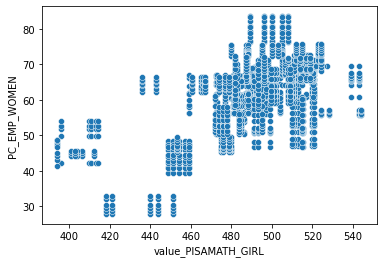

In [96]:
sns.scatterplot(data=correlation_df, x="value_PISAMATH_GIRL", y='PC_EMP_WOMEN')

<AxesSubplot:xlabel='value_PISAREAD_GIRL', ylabel='PC_EMP_WOMEN'>

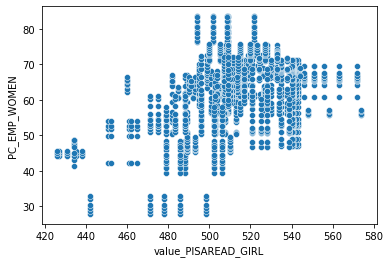

In [97]:
sns.scatterplot(data=correlation_df, x="value_PISAREAD_GIRL", y='PC_EMP_WOMEN')

<AxesSubplot:xlabel='value_PISAMATH_BOY', ylabel='PC_EMP_MEN'>

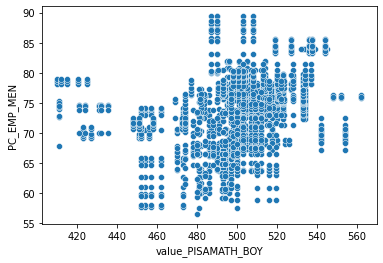

In [98]:
sns.scatterplot(data=correlation_df, x="value_PISAMATH_BOY", y='PC_EMP_MEN')

<AxesSubplot:xlabel='value_PISAREAD_BOY', ylabel='PC_EMP_MEN'>

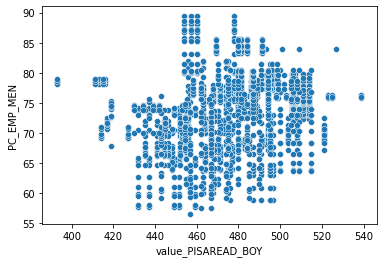

In [99]:
sns.scatterplot(data=correlation_df, x="value_PISAREAD_BOY", y='PC_EMP_MEN')

<AxesSubplot:xlabel='value_PISAMATH_BOY', ylabel='PC_EMP_MEN'>

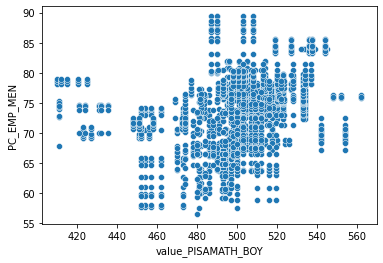

In [100]:
sns.scatterplot(data=correlation_df, x="value_PISAMATH_BOY", y='PC_EMP_MEN')

<AxesSubplot:xlabel='value_PISAMATH_BOY', ylabel='Incomeineq'>

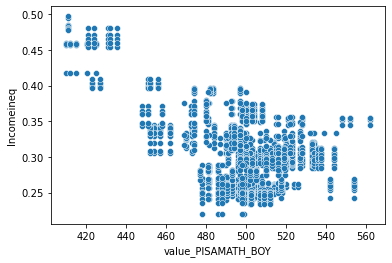

In [102]:
sns.scatterplot(data=correlation_df, x="value_PISAMATH_BOY", y='Incomeineq')

<AxesSubplot:xlabel='Incomeineq', ylabel='value_PISAMATH_GIRL'>

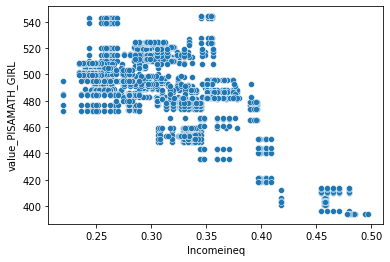

In [103]:
sns.scatterplot(data=correlation_df, y="value_PISAMATH_GIRL", x='Incomeineq')

<AxesSubplot:xlabel='Incomeineq', ylabel='value_PISAMATH_BOY'>

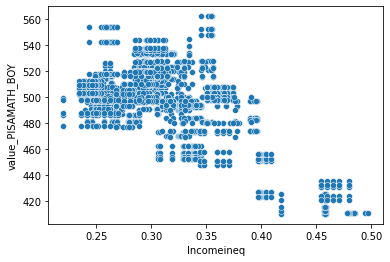

In [104]:
sns.scatterplot(data=correlation_df, y="value_PISAMATH_BOY", x='Incomeineq')

<AxesSubplot:xlabel='Incomeineq', ylabel='value_PISAREAD_BOY'>

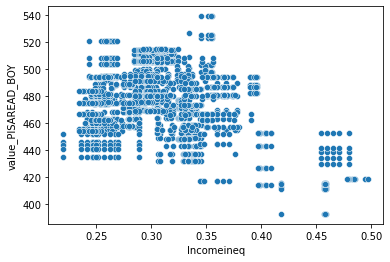

In [105]:
sns.scatterplot(data=correlation_df, y="value_PISAREAD_BOY", x='Incomeineq')

<AxesSubplot:xlabel='Incomeineq', ylabel='value_PISASCIENCE_BOY'>

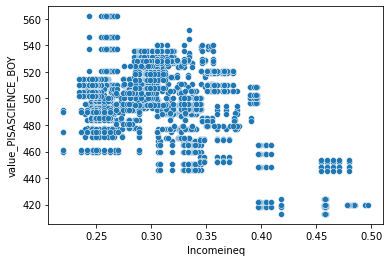

In [106]:
sns.scatterplot(data=correlation_df, y="value_PISASCIENCE_BOY", x='Incomeineq')

<AxesSubplot:xlabel='Incomeineq', ylabel='value_PISASCIENCE_GIRL'>

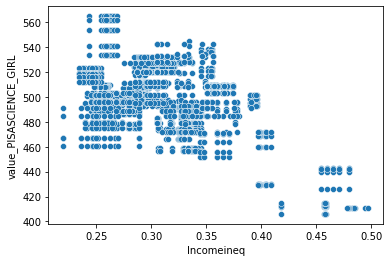

In [107]:
sns.scatterplot(data=correlation_df, y="value_PISASCIENCE_GIRL", x='Incomeineq')

<AxesSubplot:xlabel='Incomeineq', ylabel='value_PISAREAD_GIRL'>

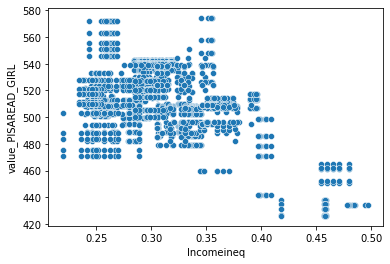

In [108]:
sns.scatterplot(data=correlation_df, y="value_PISAREAD_GIRL", x='Incomeineq')

# <u> corrélation PISA/Eco data sur l'année 2016 </u>

In [109]:
PISA_2006 = final_PISA_df[final_PISA_df['TIME']==2006]

In [110]:
PISA_2006.head(5)

,LOCATION,TIME,value_PISASCIENCE_GIRL,value_PISASCIENCE_BOY,value_PISAREAD_GIRL,value_PISAREAD_BOY,value_PISAMATH_GIRL,value_PISAMATH_BOY,diff/PISASCIENCE,diff/PISAREAD,diff/PISAMATH
0,AUS,2006,527.0,527.0,532.0,495.0,513.0,527.0,0.0,-37.0,14.0
5,AUT,2006,507.0,515.0,513.0,468.0,494.0,517.0,8.0,-45.0,23.0
9,BEL,2006,510.0,511.0,522.0,482.0,517.0,524.0,1.0,-40.0,7.0
14,CAN,2006,532.0,536.0,543.0,511.0,520.0,534.0,4.0,-32.0,14.0
19,CZE,2006,510.0,515.0,509.0,463.0,504.0,514.0,5.0,-46.0,10.0


In [111]:
eco_2016= final_eco_df[final_eco_df['TIME']==2016]

In [112]:
eco_2016.head(5)

,LOCATION,TIME,Incomeineq,PC_EMP_WOMEN,PC_EMP_MEN,diff/PC_EMP
2,AUS,2016,0.330,67.39471,77.53714,10.14243
13,AUT,2016,0.284,67.65000,75.42500,7.77500
59,CAN,2016,0.307,69.35000,75.27500,5.92500
73,CZE,2016,0.253,64.40000,79.30000,14.90000
97,FIN,2016,0.259,66.82500,69.57500,2.75000


In [113]:
PISA_2006['value_PISAMATH_GIRL'].corr(eco_2016['PC_EMP_WOMEN'])

0.6460231695064416

In [114]:
PISA_2006['value_PISAMATH_GIRL'].corr(eco_2016['PC_EMP_WOMEN'])

0.6460231695064416

In [115]:
PISA_2006['value_PISAMATH_BOY'].corr(eco_2016['PC_EMP_MEN'])

0.21826572119664703

In [116]:
PISA_2006['diff/PISAMATH'].corr(eco_2016['diff/PC_EMP'])

0.5063669972233881

In [117]:
PISA_2006['diff/PISAREAD'].corr(eco_2016['diff/PC_EMP'])

-0.5752674386706522

In [118]:
PISA_2006['diff/PISASCIENCE'].corr(eco_2016['diff/PC_EMP'])

0.3443765942764868

In [119]:
PISA_2006['diff/PISAREAD'].corr(eco_2016['Incomeineq'])

0.32410737835656755

In [120]:
PISA_2006['diff/PISAMATH'].corr(eco_2016['Incomeineq'])

0.15007856514194517

In [121]:
PISA_2006['diff/PISASCIENCE'].corr(eco_2016['Incomeineq'])

-0.5692738874658386

#  <u> matrix de correlation entre ces différentes valeurs </u>

###  merging PISA_2006 and eco_2016 

In [122]:
df=pd.merge(PISA_2006,eco_2016, on ='LOCATION')

In [123]:
df

,LOCATION,TIME_x,value_PISASCIENCE_GIRL,value_PISASCIENCE_BOY,value_PISAREAD_GIRL,value_PISAREAD_BOY,value_PISAMATH_GIRL,value_PISAMATH_BOY,diff/PISASCIENCE,diff/PISAREAD,diff/PISAMATH,TIME_y,Incomeineq,PC_EMP_WOMEN,PC_EMP_MEN,diff/PC_EMP
0,AUS,2006,527.0,527.0,532.0,495.0,513.0,527.0,0.0,-37.0,14.0,2016,0.330,67.39471,77.53714,10.14243
1,AUT,2006,507.0,515.0,513.0,468.0,494.0,517.0,8.0,-45.0,23.0,2016,0.284,67.65000,75.42500,7.77500
2,CAN,2006,532.0,536.0,543.0,511.0,520.0,534.0,4.0,-32.0,14.0,2016,0.307,69.35000,75.27500,5.92500
3,CZE,2006,510.0,515.0,509.0,463.0,504.0,514.0,5.0,-46.0,10.0,2016,0.253,64.40000,79.30000,14.90000
4,FIN,2006,565.0,562.0,572.0,521.0,543.0,554.0,-3.0,-51.0,11.0,2016,0.259,66.82500,69.57500,2.75000
5,FRA,2006,494.0,497.0,505.0,470.0,492.0,499.0,3.0,-35.0,7.0,2016,0.291,62.37500,67.75000,5.37500
6,DEU,2006,512.0,519.0,517.0,475.0,494.0,513.0,7.0,-42.0,19.0,2016,0.294,69.87500,77.35000,7.47500
7,GRC,2006,479.0,468.0,488.0,432.0,457.0,462.0,-11.0,-56.0,5.0,2016,0.333,42.80000,60.95000,18.15000
8,HUN,2006,501.0,507.0,503.0,463.0,486.0,496.0,6.0,-40.0,10.0,2016,0.280,64.20000,73.00000,8.80000
9,ISL,2006,494.0,488.0,509.0,460.0,508.0,503.0,-6.0,-49.0,-5.0,2016,0.264,83.57500,89.40000,5.82500


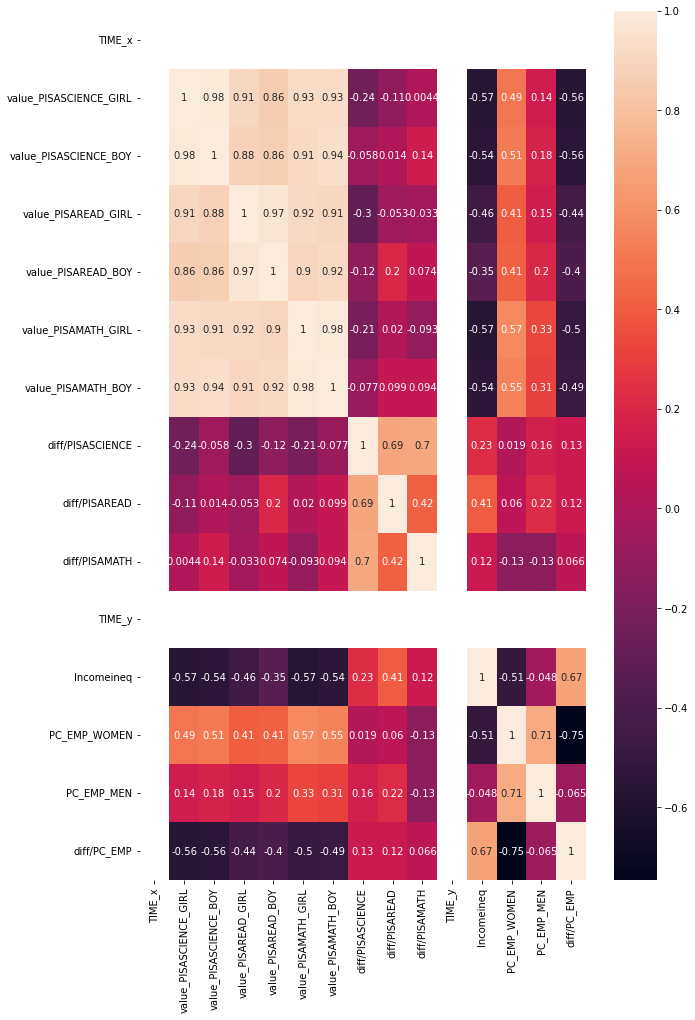

In [127]:
plt.figure(figsize=(10, 16))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [129]:
df.to_csv('PISA_eco.csv', index=False)